# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> ECE 046211 - Technion - Deep Learning
---

## HW2 - Multilayer NNs and Convolutional NNs
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Gal Granot|gal.granot@campus.technion.ac.il|315681593|
|Nir Tevet| nir.tevet@campus.technion.ac.il| 208731422|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**.
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ece046211_hw2_id1_id2.ipynb`.
    * If you answered the questions in a different file you should submit a `.zip` file with the name `ece046211_hw2_id1_id2.zip` with content:
        * `ece046211_hw2_id1_id2.ipynb` - the code tasks
        * `ece046211_hw2_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw2` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Generalization in A Teacher-Student Setup](#-Question-1--Generalization-in-A-Teacher-Student-Setup)
    * [Q2 - "Typical" Generalization in Multilayer Neural Networks](#-Question-2---"Typical"-Generalization-in-Multilayer-Neural-Networks)
    * [Q3 - Deep Double Descent](#-Question-3---Deep-Double-Descent)
    * [Q4 - Initialization](#-Question-4---Initialization)
    * [Q5 - Equivariance](#-Question-5---Equivariance)
    * [Q6 - VGG Architecture](#-Question-6--VGG-Architecture)
* [Part 2 - Code Assignments](#-Part-2---Code-Assignments)
    * [Task 1 - The Importance of Activation and Initialization](#-Task-1---The-Importance-of-Activation-and-Initialization)
    * [Task 2 - MLP-based Deep Classifer](#-Task-2---MLP-based-Deep-Classifer)
    * [Task 3 - Design a CNN](#-Task-3---Design-a-CNN)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 -Generalization in A Teacher-Student Setup
---

Recall from lecture 4 the Bayes Risk $\mathcal{\overline{R}}(w)$: $$ \mathcal{\overline{R}}(w) \triangleq \mathbb{E}_{\epsilon \sim \mathcal{N}(0, \sigma_{\epsilon}^2I), w_{true} \sim \mathcal{N}(0,\frac{\sigma_w^2}{d}I) } \left[\mathcal{R}\right], $$ where, $$ \mathcal{R}(w_{\mu}) = ||w_{\mu}-w_{true}||^2 = ||(H_{\mu}^{-1}H-I)w_{true} + H_{\mu}^{-1}X^T\epsilon||^2 $$

Prove:

$$ \overline{\mathcal{R}}(w_{\mu}) = \sum_{i=1}^d \frac{(\sigma_w^2/d) \mu^2 + \sigma_{\epsilon}^2 \lambda_i}{(\lambda_i + \mu)^2} $$

Hints:
* $\mathbb{E} \left[\epsilon^TXH_{\mu}^{-1}H_{\mu}^{-1}X^T\epsilon \right] = \sum_{i,j}^N\mathbb{E}[\epsilon_i \epsilon_j] \left(XH_{\mu}^{-1} \right)_i\left(H_{\mu}^{-1}X^T \right)_j$

* $\mathbb{E}[\epsilon_i \epsilon_j] = \sigma_{\epsilon}^2 \delta_{ij}$

* $\sum_{i=1}^N \left(XH_{\mu}^{-1} \right)_i\left(H_{\mu}^{-1}X^T \right)_i = Tr\left[XH_{\mu}^{-2}X^T \right] $

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - "Typical" Generalization in Multilayer Neural Networks
---


We examine a "student" neural network  $f_{\mathbf{w}}\left(\mathbf{x}\right)$ with parameter vector $\mathbf{w}\in\mathbb{R}^{k}$ and input $\mathbf{x}\in\mathbb{R}^{d_{0}}$  used in a binary classification problem where the training set is $\mathcal{S}=\left\{ \mathbf{x}^{\left(n\right)}\right\} _{n=1}^{N}$ sampled i.i.d. from $P_{X}$, where the binary $\left(\pm1\right)$ labels are generated by a "teacher" neural network $f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)$ with the same architecture. To understand the "typical" generalization of the student, we examine the following "Guess and Check" algorithm to learn its weights: we randomly sample parameters vectors $\mathbf{w}_{1},\mathbf{w}_{2},...$ i.i.d.from $P_{W}$, in which each parameter is sampled independently from a uniform distribution over $Q=\left\{ -\left(q-1\right)/2,\dots,-1,0,1,\dots,\left(q-1\right)/2\right\} $ quantization levels, where $q=\left|Q\right|$ is an odd positive number. We do this until a stopping time $t$ in which we perfectly fit the dataset: $\forall n:f_{\mathbf{w}_{t}}\left(\mathbf{x}^{\left(n\right)}\right)=f_{\mathbf{w}_{\star}}\left(\mathbf{x}^{\left(n\right)}\right)$. We examine a two-layer neural network with $d_{1}$ hidden neurons
$$
f_{\mathbf{w}}\left(\mathbf{x}\right)=\mathrm{sign}\left(\mathbf{w}_{2}^{\top}\left[\mathbf{W}_{1}\mathbf{x}\right]_{+}\right)
$$
where $\left[\cdot\right]_{+}$ is the ReLU activation function, the teacher has at most $d_{1}^{\star}<d_{1}$ non-zero neurons (i.e., the other $d_{1}-d_{1}^{\star}$ hidden neurons in the teacher to have all the incoming and outgoing weights equal to zero).

1. Calculate the probability $P_{\mathbf{w}\sim P_{W}}\left(\mathbf{w}=\mathbf{w}_{\star}\right).$
2. Prove that \begin{equation}
(1) \:\:p_{\star}\triangleq P_{\mathbf{w}\sim P_{W}}\left(\forall\mathbf{x}:f_{\mathbf{w}}\left(\mathbf{x}\right)=f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)\geq q^{-d_{0}d_{1}^{*}-d_{1}}\,.
\end{equation}
3. Show that for any constant $T>0$, we can bound the probability of stopping time $t>T$ as \begin{equation} (2) \:\:
\left\lfloor T\right\rfloor \leq\frac{\log P\left(t>T\right)}{\log\left(1-p_{\star}\right)}\,.
\end{equation}
4. Prove the generalization bound:<br>
   **Theorem 1** *With probability* $\left(1-\eta\right)\left(1-\delta\right)$, \begin{equation}(3) \:\:
\epsilon<\frac{\left(d_{0}d_{1}^{\star}+d_{1}\right)\log q+\log\frac{1}{\delta}+\log\log\frac{1}{\eta}}{N}
\end{equation} **Hint**: Combine the results from previous sections, using the approximations $\left\lfloor T\right\rfloor \approx T$ and $\log\left(1-p_{\star}\right)\approx-p_{\star}$ (treat these approximations as exact), and the following basic generalization
 bound (which we learned in class):<br>
     **Theorem 2** *For any* $f\in\left|\mathcal{F}\right|$ $f\in\left|\mathcal{F}\right|$, *with probability* $1-\delta$, \begin{equation} (4) \:\:
\epsilon\triangleq\mathbb{P}_{\mathbf{x}}\left(f_{\mathbf{w}}\left(\mathbf{x}\right)\neq f_{\mathbf{w}_{\star}}\left(\mathbf{x}\right)\right)<\frac{\log\left|\mathcal{F}\right|+\log\frac{1}{\delta}}{N}\,.
\end{equation}
5. Is the bound in eq. $(3)$ better than the bound in eq. $(4)$ in which $\mathcal{F}=\left\{ f_{\mathbf{w}}:\mathbf{w}\in Q^{k}\right\} $  is the student hypothesis class (in which each parameter can have one of $q$ values)? Explain and ignore the (negligble) $\log\log\frac{1}{\eta}$ term.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Deep Double Descent
---

For the following plots:
1. Where is the critical point (the point of transition between the "Classical Regime" and "Modern Regime") of the deep double descent?
2. What type of double descent is shown (**look closely at the graph**)? Explain. There can be more than one correct answer.
    

a. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_transformer.PNG' style="height:300px">

b. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_resnet.PNG' style="height:400px">

c. <img src='https://raw.githubusercontent.com/taldatech/ee046211-deep-learning/main/assets/double_descent_intermediate.PNG' style="height:300px">

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 4 - Initialization
---
Recall that in lecture 5 we were discussing how to calculate the initialization variance, and reached the conclusion that $$ \sigma_l =\frac{1}{\sqrt{\sum_j \mathbb{E} \left[\varphi^2(u_{l-1}[j])\right]}} $$
Show that for ReLU activation ($\varphi(z) = max(0,z)$), the optimal variance satisfies: $$ \sigma_l = \sqrt{\frac{2}{d_{l-1}}}$$

1. Under the assumption that the distribution of $W$ is symmetric ($\to$ the distribution of $u$ is symmetric).
2. Using the central limit theorem for large width.

Answer each section **separately** and assume the sections are independent.

All the notations are the same as in the lecture slides.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 5 - Equivariance
---

Recall from lecture 6:
A function $f: \mathbb{R}^d \to \mathbb{R}^d$ is equivariant if $f(\tau \cdot x) = \tau \cdot f(x)$ for all $\tau$.

Let $f_w(x) = \phi (Wx)$ where $\phi$ is a component-wise non-linearity and $W \in \mathbb{R}^{d\times d}$. Prove that $f_w:\mathbb{R}^d \to \mathbb{R}^d$ is equivariant to transformation family $H$ **if and only if**: $$ \forall \tau \in H, W[i, j] = W[\tau(i), \tau(j)] $$

* Assume one-by-one activations (<a href="https://en.wikipedia.org/wiki/Injective_function">Injective functions/one-by-one</a>)

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 6 -VGG Architecture
---

1. The VGG-11 CNN architecture consists of 11 convolution (CONV)/fully-connected (FC) layers (every CONV layer has the same padding and stride, every MAXPOOL layer is 2×2 and has padding of 0 and stride 2). Fill in the table. You need to **consider the bias**.


* CONV$M$-$N$: a convolutional layer of size $M \times M \times N$, where $M$ is the kernel size and $N$ is the number of filters. $stride=1, padding=1$.
* POOL2: $2 \times 2$ Max Pooling with $stride=2$
    * In case the input of the layer is odd, you should round down. For example, if the output of the layer should be $3.5 \times 3.5 \times 3$, you should round to $3 \times 3 \times 3$ (i.e., ignore the last column of the input image when performing MaxPooling).
* FC-N: a fully connected layer with $N$ neurons.


| Layer  | Output Dimension  | Number of Parameters (Weights) |
|---|---|---|
| INPUT  |  224x224x3 | 0  |
|  CONV3-64 | -  | -  |
| ReLU |  - | -  |
| POOL2|  - | -  |
|CONV3-128 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
|CONV3-256 | - | -|
|ReLU | - | -|
|CONV3-256 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
|CONV3-512 | - | -|
|ReLU | - | -|
|CONV3-512 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
|CONV3-512 | - | -|
|ReLU | - | -|
|CONV3-512 | - | -|
|ReLU | - | -|
| POOL2|  - | -  |
| FC-4096|  - | -  |
| FC-4096|  - | -  |
| FC-1000|  - | -  |
| SOFTMAX|  - | -  |

2. What is the total number of parameters? (use a calculator for this one)
3. What percentage of the weights are found in the fully-connected layers?

### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

#### Tips
---
1. Uniformly distributed tensors - `torch.Tensor(dim1, dim2, ...,dimN).uniform_(-1, 1)`
2. Separation to **validation set** in PyTorch - <a href="https://gist.github.com/MattKleinsmith/5226a94bad5dd12ed0b871aed98cb123">See example here</a>.

In [2]:
# imports for the practice (you can add more if you need)
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# %matplotlib notebook
%matplotlib inline

seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1 - The Importance of Activation and Initialization
---
In this task, we are going to use $x \in \mathcal{R}^{512}$ and simple neural network that outputs $f(x) \in \mathcal{R}^{512}$. The network will have 100 layers with 512 units in each layer.

1. We initialize the weights from a unit normal distribution. Run the following code cell and explain what happens. Add a short piece of code that locates when it happens (hint: use `torch.isnan()`). **Print** the layer number.
2. We can demonstrate that at a given layer, the matrix product of inputs $x$ and weight matrix $a$ that is initialized from a standard normal distribution will, on average, have a standard deviation very close to the square root of the number of input connections. For our example, with 512 dimensions, show that for 10,000 multiplications of $a$ and $x$, the empirical standard deviation is similar to the square root of the number of input connections. Use the unbiased version: $$ \hat{std} = \sqrt{\frac{\sum_{i=1}^{10000}\frac{1}{N}\sum_{j=1}^N y^2}{10000}}, $$ where $y=ax$ and $N$ is the number of input connections. **Print** the mean, std and the square root of the number of input connections.
3. For the code from 1, normalize the weight initialization by the square root of the input connections. How does that change the outcome? **Print** the mean and std after the modification.
4. Add a `tanh()` activation after each layer for the code from 1. **Print** the mean and std after the modification. Explain the result.
5. Xavier initialization sets a layer’s weights to values chosen from a random uniform distribution that’s bounded between $$\pm \sqrt{\frac{6}{n_i + n_{i+1}}}$$ where $n_i$ is the number of incoming network connections, or “fan-in,” to the layer, and $ n_{i+1}$ is the number of outgoing network connections from that layer, also known as the “fan-out”. Glorot and Bengio believed that Xavier weight initialization would maintain the variance of activations and back-propagated gradients all the way up or down the layers of a network and demonstrated that networks initialized with Xavier achieved substantially quicker convergence and higher accuracy. Implement **Xavier Uniform** as `xavier_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Xavier Uniform**. Use it on the simple network from 1 with `tanh` activation. **Print** the mean and std after the modification.
6. If you try to replace the `tanh` activation with `relu` activation in section 5, you will see very different results. Xavier strives to acheive activation outputs of each layer to have a mean of 0 and a standard deviation around 1, on average. When using a ReLU activation, a single layer will, on average have standard deviation that’s very close to the square root of the number of input connections, **divided by the square root of two** ($\sqrt{\frac{512}{2}}$ in our example). **Kaiming He et. al.** proposed an initialization scheme that’s tailored for deep neural nets that use these kinds of asymmetric, non-linear activations. Implement **Kaiming Normal** as `kaiming_init(fan_in, fan_out)`, a function that returns a tensor initialized according to **Kaiming Normal** (use `fan_in` mode). Use it on the simple network from 1 with `relu` activation. **Print** the mean and std after the modification. What happens when you use Xavier with RelU activation?

In [48]:
x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512)
    x = a @ x
print(x.mean(), x.std())

tensor(nan) tensor(nan)


Your answers here

In [49]:
#Q1.1
x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512)
    x = a @ x
    if torch.isnan(x).any():
        print(f"the layer number where we first get x=nan is {i}")
        break


the layer number where we first get x=nan is 28


In [52]:
#Q1.2

N = 512
num_samples = 10000
stds = []

for _ in range(num_samples):
    x = torch.randn(N)
    a = torch.randn(N, N)
    y = a @ x
    stds.append(torch.sum(y**2) / N)
    # stds.append(y.std().item)
empirical_std = np.sqrt(np.mean(stds))
expected_std = np.sqrt(N)

print(f"Empirical Std: {empirical_std}, Expected Std: {expected_std}")


Empirical Std: 22.638668060302734, Expected Std: 22.627416997969522


In [53]:
#Q1.3
x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512) / np.sqrt(512)
    x = a @ x

print(f"Mean: {x.mean().item()}, Std: {x.std().item()}")


Mean: -0.009038467891514301, Std: 1.2875431776046753


In [54]:
#Q1.4
x = torch.randn(512)
for i in range(100):
    a = torch.randn(512, 512) / np.sqrt(512)
    x = torch.tanh(a @ x)

print(f"Mean: {x.mean().item()}, Std: {x.std().item()}")

Mean: 0.0047906506806612015, Std: 0.04249276965856552


In [55]:
#Q1.5
def xavier_init(fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return torch.Tensor(fan_out, fan_in).uniform_(-limit, limit)

x = torch.randn(512)
for i in range(100):
    a = xavier_init(512, 512)
    x = torch.tanh(a @ x)

print(f"Mean: {x.mean().item()}, Std: {x.std().item()}")


Mean: -0.003310833591967821, Std: 0.08566287159919739


In [56]:
#Q1.6

def kaiming_init(fan_in, fan_out, mode='fan_in'):
    std = np.sqrt(2 / fan_in)
    return torch.randn(fan_out, fan_in) * std

x = torch.randn(512)
for i in range(100):
    a = kaiming_init(512, 512)
    x = torch.relu(a @ x)

print(f"Mean: {x.mean().item()}, Std: {x.std().item()}")


Mean: 0.1529138684272766, Std: 0.2227742224931717


Kaiming initialization is perfect for deep neural networks using ReLU activations because it keeps the standard deviation from growing too much. If you use Xavier initialization with ReLU, the values can get really large, making the network unstable. Kaiming's method avoids this by using the right scaling for ReLU activations.

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - MLP-based Deep Classifer
---
In this task you are going to design and train your first neural network for classification.

For this task, we will use the "<a href="https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope">MAGIC Gamma Telescope Data Set"</a>. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera.

Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (**signal**) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (**background**).

Our data has 10 features and 2 classes (signal and background).

1. Load the MAGIC dataset sored in `magic04.data` and display the first 5 features (just run the cell).
2. Separate the data to train, validation and test, reserve 10% of the data for validation and 20% for test.
3. Perform pre-processing steps of your choice and convert the class label from `str` to `int` (for example, `y_train = np.array([0 if y_train[i] == 'g' else 1 for i in range(len(y_train))]).astype(np.int)`).
4. Train a Logistic Regression model from `sklearn` as a baseline for our neural network (only for this section use both the train and validation sets for training the classifier). **Print the test accuracy**.
5. Convert the `numpy` arrays to `torch` tensors with `TensorDataset` as done in the tutorial.
6. Design a **MLP** to classify the data. Optimize the hyper-parameters of your model using the accuracy on the validation set, and when you are satisfied with the model train it on both the train and validation sets and evaluate it on the test set. **You need to reach at least 85% accuracy on the test set, and 87% for a full grade**.
    * You have a free choice of architecture, optimizer, learning scheduler, initialization, regularization and activations.
    * The loss criterion is binary cross entropy: `nn.BCEWithLogitsLoss()` (performs `sigmoid` for you) or `nn.BCELoss` (you need to apply `sigmoid` on the network output yourself).
    * In a Markdown block, write down the chosen architectures and all the hyper-parameters.
        * Make sure to describe any design choice that you used to improve the performance (e.g. if you used a certain regularization or layer, mention it and describe why you think it helped).
    * **Plot** the loss curves (and any oter statistic you want) as a function of epochs/iterations. **Print** the final performance.
    * **Print** the test accuracy.
7. Pick **2** initializations of your choosing and change the initialization of the linear layers and re-train the model (with the same optimal hyper-parameters you found). You can pick an initialization of your choosing from : https://pytorch.org/docs/stable/nn.init.html . See example below how to use. **Print** the change in accuracy for both changes (you should end up with 3 results - original, `init 1` and `init 2`).

In [4]:
# Imports
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.linear_model import LogisticRegression

# loading the data
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
data = pd.read_csv("./magic04.data", names=col_names)
X = data[feature_names]
Y = data['class']
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
# separate to train, test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
x_train, x_val, y_train, y_val = train_test_split(x_test, y_test, test_size=0.125, random_state=2)

print(f"{len(y_train)} training samples\n{len(y_test)} test samples\n{len(y_val)} validation samples")

3328 training samples
3804 test samples
476 validation samples


In [6]:
def process_labels(labels):
    return np.array([0 if label == 'g' else 1 for label in labels]).astype(int)

def scale_features(scaler, features):
    return scaler.transform(features)

feature_scalar = preprocessing.StandardScaler()
feature_scalar.fit(x_train)
x_train = scale_features(feature_scalar, x_train)
x_test = scale_features(feature_scalar, x_test)
x_val = scale_features(feature_scalar, x_val)

y_train = process_labels(y_train)
y_val = process_labels(y_val)
y_test = process_labels(y_test)

In [7]:
# training a Logistic Regression baseline - complete the code with your variables
logistic_model = LogisticRegression(solver='lbfgs')
x_baseline = np.concatenate((x_train, x_val))
y_baseline = np.concatenate((y_train, y_val))
y_pred = logistic_model.fit(x_baseline, y_baseline).predict(x_baseline)
print("Number of mislabeled points %d out of %d total points."% ((y_baseline != y_pred).sum(), x_baseline.shape[0]))
print("Logistic Regression Model accuracy =" , logistic_model.score(x_test, y_test))

Number of mislabeled points 787 out of 3804 total points.
Logistic Regression Model accuracy = 0.7931125131440588


In [8]:
# create TensorDataset from numpy arrays
from torch.utils.data import TensorDataset, DataLoader
mg_train_ds = TensorDataset(torch.from_numpy(x_train).float(), torch.from_numpy(y_train).float())
mg_val_ds = TensorDataset(torch.from_numpy(x_val).float(), torch.from_numpy(y_val).float())
mg_test_ds = TensorDataset(torch.from_numpy(x_test).float(), torch.from_numpy(y_test).float())

In [9]:
# model, hyper-paramerters and training
import torch.nn as nn
class MagicClassifier(nn.Module):
    def __init__(self, input_dim, hl1_dim, hl2_dim, output_dim):
        super(MagicClassifier, self).__init__()
        self.hidden_layer = nn.Sequential(
            nn.Linear(input_dim, hl1_dim),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(hl1_dim, hl2_dim),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(hl2_dim, output_dim)

    def forward(self, x):
        return self.output_layer(self.hidden_layer(x))

#hyper-parameters:
features_num = len(feature_names)
output_dim = 1
batch_size = 128
learning_rate = 0.01
epochs = 200
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
criterion = nn.BCEWithLogitsLoss()
train_dataloader = DataLoader(mg_train_ds, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(mg_val_ds, batch_size=batch_size, shuffle=False)
stopping_criteria = 1e-6

starting model with hl1=128, hl2=128


Epoch 0/200: loss = 0.48853809902301204, val accuracy = 0.8004201680672269
Epoch 10/200: loss = 0.35724566533015323, val accuracy = 0.8571428571428571
Epoch 20/200: loss = 0.3225738595311458, val accuracy = 0.8718487394957983
Epoch 30/200: loss = 0.31301126972987103, val accuracy = 0.8466386554621849
Epoch 40/200: loss = 0.30655433524113435, val accuracy = 0.8613445378151261
Epoch 50/200: loss = 0.29354851234417695, val accuracy = 0.8718487394957983
Epoch 60/200: loss = 0.28984710516837925, val accuracy = 0.8697478991596639
Epoch 70/200: loss = 0.28431967015449816, val accuracy = 0.8718487394957983
Epoch 80/200: loss = 0.2771515565422865, val accuracy = 0.8613445378151261
Epoch 90/200: loss = 0.28330651040260607, val accuracy = 0.8550420168067226
Epoch 100/200: loss = 0.2675722252864104, val accuracy = 0.8529411764705882
Epoch 110/200: loss = 0.27332187214723, val accuracy = 0.8550420168067226
Epoch 120/200: loss = 0.26664912643340916, val accurac

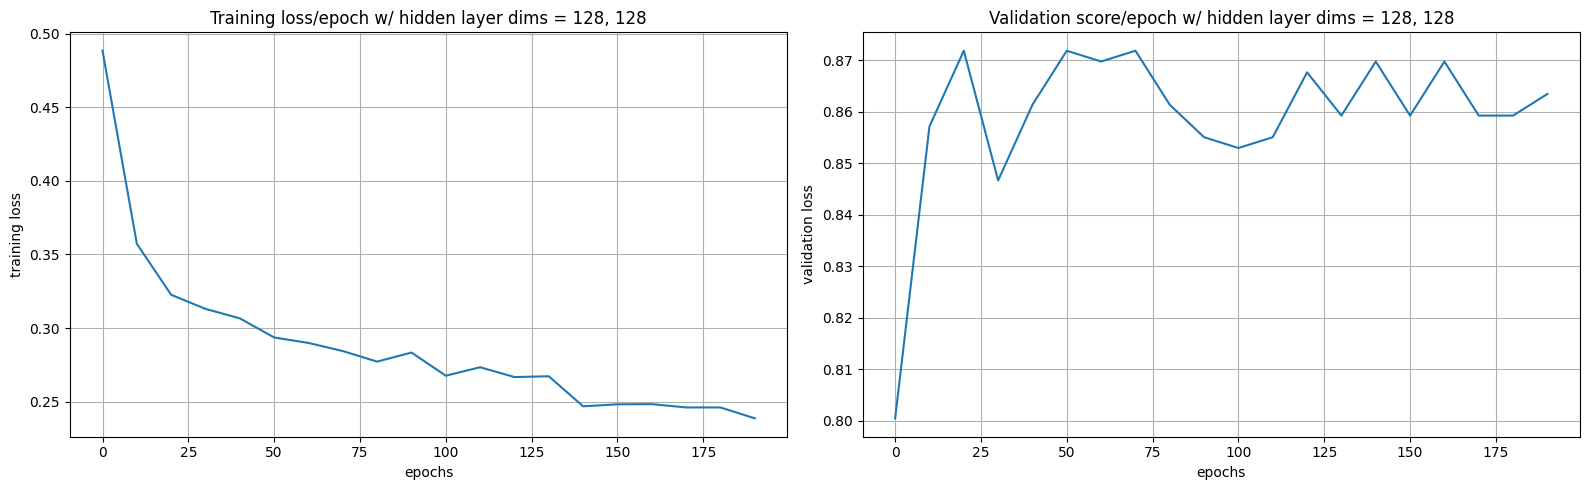

starting model with hl1=128, hl2=256


Epoch 0/200: loss = 0.48655031621456146, val accuracy = 0.7941176470588235
Epoch 10/200: loss = 0.34509767018831694, val accuracy = 0.8613445378151261
Epoch 20/200: loss = 0.3395503151875276, val accuracy = 0.8739495798319328
Epoch 30/200: loss = 0.31824386291779005, val accuracy = 0.8697478991596639
Epoch 40/200: loss = 0.2993076741695404, val accuracy = 0.8571428571428571
Epoch 50/200: loss = 0.2864878722108327, val accuracy = 0.865546218487395
Epoch 60/200: loss = 0.2870906035487468, val accuracy = 0.8676470588235294
Epoch 70/200: loss = 0.28686622988719207, val accuracy = 0.8634453781512605
Epoch 80/200: loss = 0.28232762676018935, val accuracy = 0.8592436974789915
Epoch 90/200: loss = 0.26966481369275314, val accuracy = 0.8634453781512605
Epoch 100/200: loss = 0.28069536273296064, val accuracy = 0.8634453781512605
Epoch 110/200: loss = 0.2609417684949361, val accuracy = 0.8613445378151261
Epoch 120/200: loss = 0.2718718212384444, val accuracy

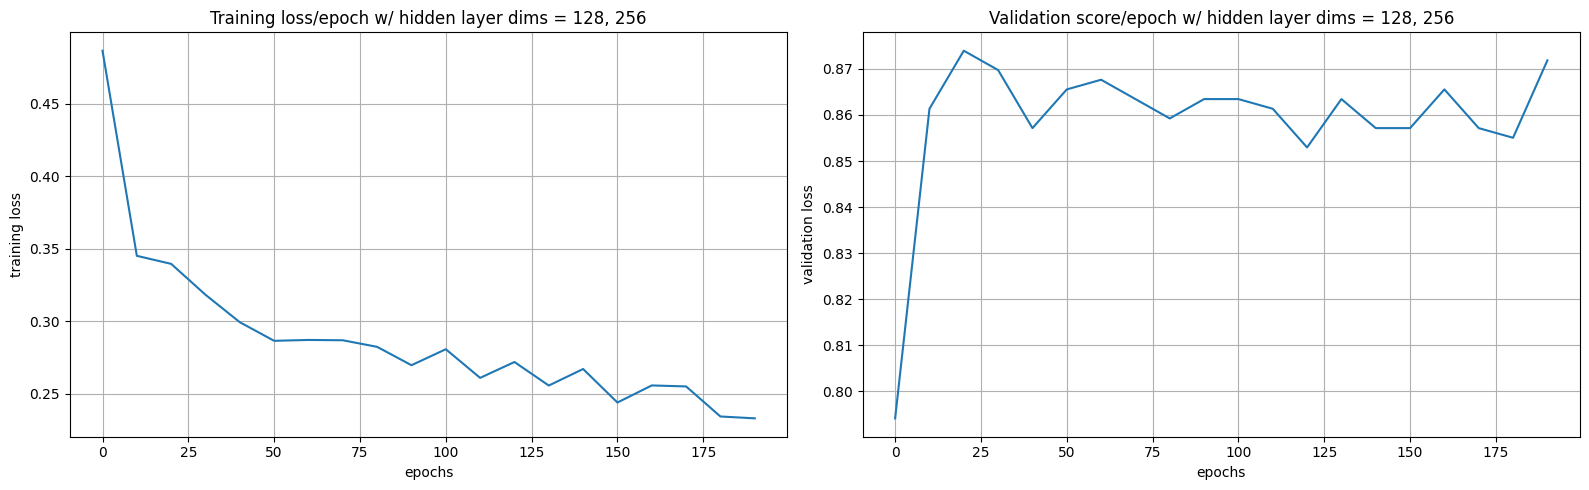

starting model with hl1=256, hl2=128


Epoch 0/200: loss = 0.46131733747629017, val accuracy = 0.8130252100840336
Epoch 10/200: loss = 0.3402780672678581, val accuracy = 0.865546218487395
Epoch 20/200: loss = 0.3111124560236931, val accuracy = 0.865546218487395
Epoch 30/200: loss = 0.2948773285517326, val accuracy = 0.8676470588235294
Epoch 40/200: loss = 0.2972148760006978, val accuracy = 0.8823529411764706
Epoch 50/200: loss = 0.27838940861133427, val accuracy = 0.865546218487395
Epoch 60/200: loss = 0.2711288430369817, val accuracy = 0.8697478991596639
Epoch 70/200: loss = 0.2640982304628079, val accuracy = 0.865546218487395
Epoch 80/200: loss = 0.2650000905761352, val accuracy = 0.865546218487395
Epoch 90/200: loss = 0.2487198538505114, val accuracy = 0.8697478991596639
Epoch 100/200: loss = 0.255878841647735, val accuracy = 0.8592436974789915
Epoch 110/200: loss = 0.23292348992366058, val accuracy = 0.8676470588235294
Epoch 120/200: loss = 0.2201680254477721, val accuracy = 0.8739

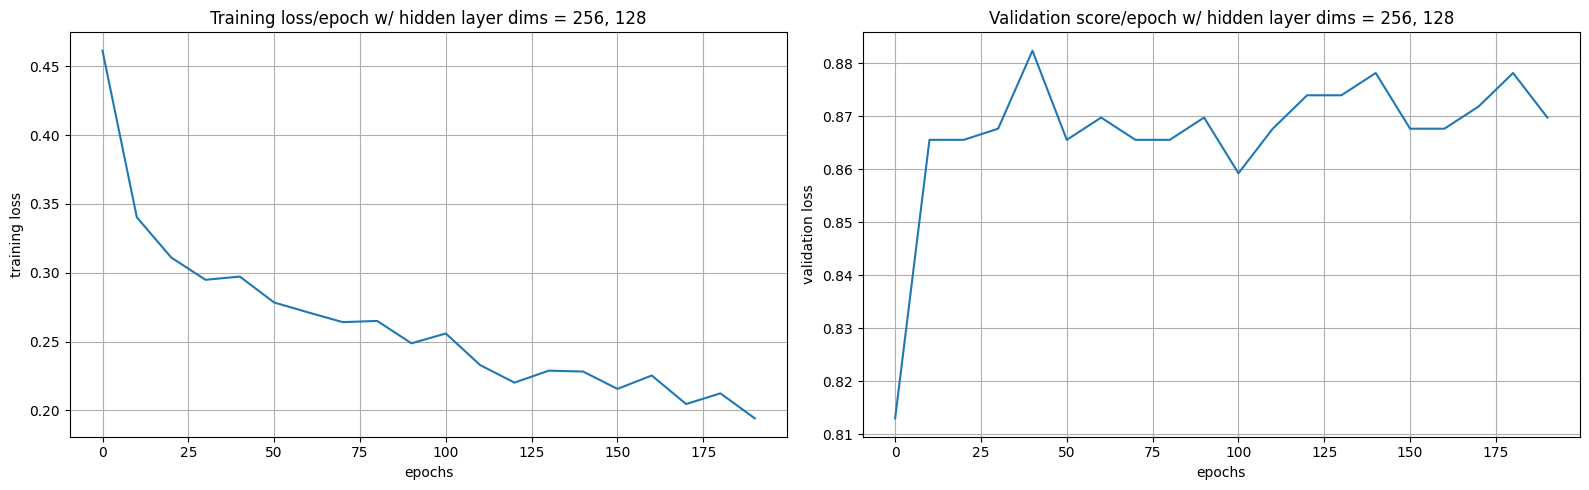

starting model with hl1=256, hl2=256


Epoch 0/200: loss = 0.46776465956981367, val accuracy = 0.8109243697478992
Epoch 10/200: loss = 0.3393645126086015, val accuracy = 0.8613445378151261
Epoch 20/200: loss = 0.3212199377325865, val accuracy = 0.8718487394957983
Epoch 30/200: loss = 0.2951504055124063, val accuracy = 0.8697478991596639
Epoch 40/200: loss = 0.2920259048159306, val accuracy = 0.8781512605042017
Epoch 50/200: loss = 0.2748550812785442, val accuracy = 0.8634453781512605
Epoch 60/200: loss = 0.25566447182343555, val accuracy = 0.865546218487395
Epoch 70/200: loss = 0.26748583809687543, val accuracy = 0.8529411764705882
Epoch 80/200: loss = 0.25973106920719147, val accuracy = 0.865546218487395
Epoch 90/200: loss = 0.2519102944777562, val accuracy = 0.8508403361344538
Epoch 100/200: loss = 0.24088610823337847, val accuracy = 0.8676470588235294
Epoch 110/200: loss = 0.2297799249108021, val accuracy = 0.8613445378151261
Epoch 120/200: loss = 0.23436293005943298, val accuracy =

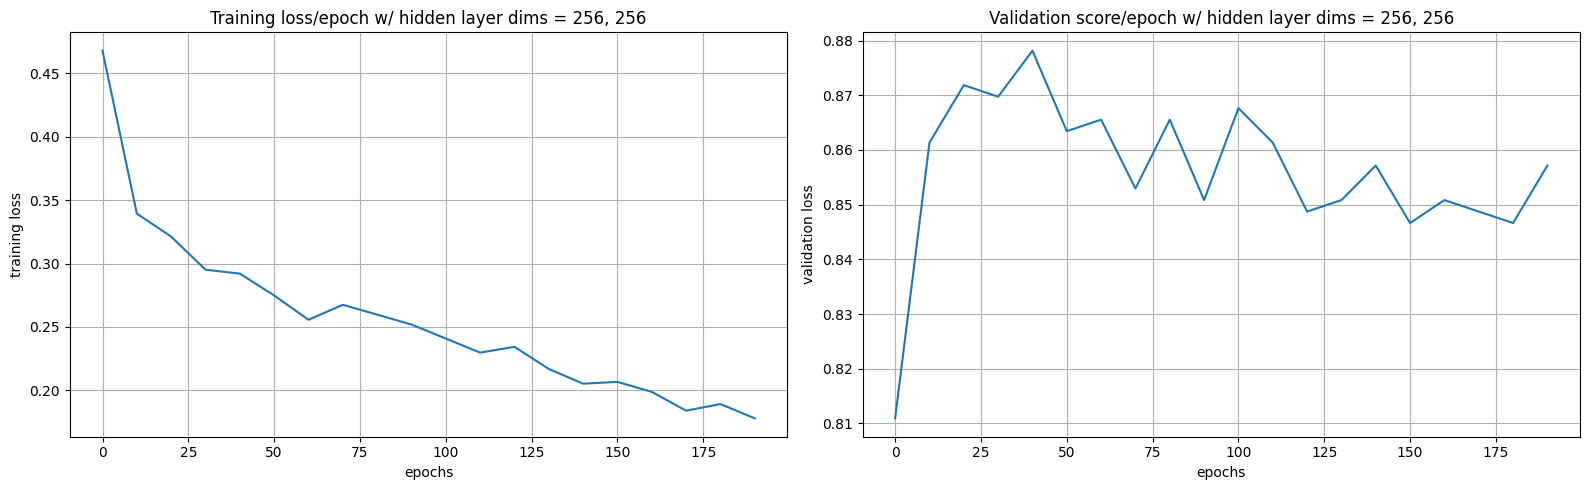

In [10]:
#training

def calc_score(model, dl, device):
    model.eval()
    correct_preds = 0
    total_preds = 0
    with torch.no_grad():
        for data in dl:
            features, targets = data
            output = model(features)
            pred = (torch.sigmoid(output.data).squeeze() > 0.5).int()
            total_preds += targets.size(0)
            correct_preds += (pred == targets).sum().item()
    return correct_preds / total_preds

layer_dim_options = np.array([2 ** i for i in range(7, 9)])
scores = np.zeros((9-7, 9-7))
train_loss_dict = {}
val_score_dict = {}
epochs_indices = np.arange(0, epochs, 10)

for i1, hl1 in enumerate(layer_dim_options):
    for i2, hl2 in enumerate(layer_dim_options):
        print(f"starting model with hl1={hl1}, hl2={hl2}\n\n")
        model = MagicClassifier(input_dim=features_num, hl1_dim=hl1, hl2_dim=hl2, output_dim=output_dim)
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        for epoch in range(epochs):
            model.train()
            losses = []
            for features, targets in train_dataloader:
                output = model(features)
                loss = criterion(output.view(-1), targets)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                losses.append(loss.item())
            if epoch % 10 == 0:
                val_score = calc_score(model, val_dataloader, device)
                val_score_dict[epoch] = val_score
                current_epoch_loss = np.mean(losses)
                train_loss_dict[epoch] = current_epoch_loss
                print(f"Epoch {epoch}/{epochs}: loss = {current_epoch_loss}, val accuracy = {val_score}")
        scores[i1, i2] = val_score

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
        ax1.plot(epochs_indices, [train_loss_dict[_epoch] for _epoch in epochs_indices])
        ax1.set_title(f"Training loss/epoch w/ hidden layer dims = {hl1}, {hl2}")
        ax1.set_xlabel("epochs")
        ax1.set_ylabel("training loss")
        ax1.grid()

        ax2.plot(epochs_indices, [val_score_dict[_epoch] for _epoch in epochs_indices])
        ax2.set_title(f"Validation score/epoch w/ hidden layer dims = {hl1}, {hl2}")
        ax2.set_xlabel("epochs")
        ax2.set_ylabel("validation loss")
        ax2.grid()

        plt.tight_layout()
        plt.show()

Epoch 0/200: loss = 0.4793389797210693, val accuracy = 0.8256302521008403
Epoch 10/200: loss = 0.342434165875117, val accuracy = 0.8718487394957983
Epoch 20/200: loss = 0.3201549743612607, val accuracy = 0.8760504201680672
Epoch 30/200: loss = 0.3090862120191256, val accuracy = 0.8865546218487395
Epoch 40/200: loss = 0.3094371661543846, val accuracy = 0.8991596638655462
Epoch 50/200: loss = 0.3007558360695839, val accuracy = 0.8886554621848739
Epoch 60/200: loss = 0.289079545934995, val accuracy = 0.8907563025210085
Epoch 70/200: loss = 0.2893142208456993, val accuracy = 0.907563025210084
Epoch 80/200: loss = 0.28313434720039365, val accuracy = 0.8970588235294118
Epoch 90/200: loss = 0.27058527966340384, val accuracy = 0.9012605042016807
Epoch 100/200: loss = 0.26443803757429124, val accuracy = 0.9117647058823529
Epoch 110/200: loss = 0.2714429517587026, val accuracy = 0.9180672268907563
Epoch 120/200: loss = 0.26910077085097633, val accuracy = 0.9054621848739496
Epoch 130/200: loss = 

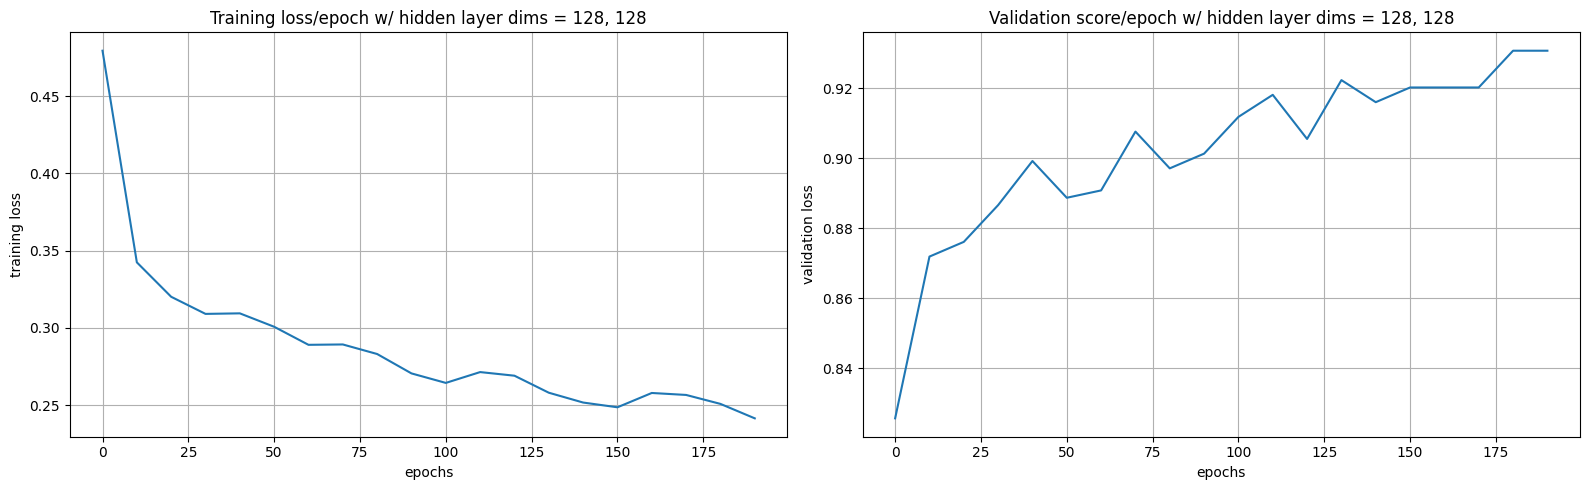

In [11]:
#select best model and train it on both train and val
hl1_dim = 128
hl2_dim = 128
full_ds = mg_train_ds + mg_val_ds
full_dl = DataLoader(full_ds, batch_size=batch_size, shuffle=True)
model = MagicClassifier(input_dim=features_num, hl1_dim=hl1_dim, hl2_dim=hl2_dim, output_dim=output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_loss_dict = {}
val_score_dict = {}
epochs_indices = np.arange(0, epochs, 10)


for epoch in range(epochs):
    model.train()
    losses = []
    for features, targets in full_dl:
        output = model(features)
        loss = criterion(output.view(-1), targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if epoch % 10 == 0:
        val_score = calc_score(model, val_dataloader, device)
        val_score_dict[epoch] = val_score
        current_epoch_loss = np.mean(losses)
        train_loss_dict[epoch] = current_epoch_loss
        print(f"Epoch {epoch}/{epochs}: loss = {current_epoch_loss}, val accuracy = {val_score}")



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.plot(epochs_indices, [train_loss_dict[_epoch] for _epoch in epochs_indices])
ax1.set_title(f"Training loss/epoch w/ hidden layer dims = {hl1_dim}, {hl2_dim}")
ax1.set_xlabel("epochs")
ax1.set_ylabel("training loss")
ax1.grid()

ax2.plot(epochs_indices, [val_score_dict[_epoch] for _epoch in epochs_indices])
ax2.set_title(f"Validation score/epoch w/ hidden layer dims = {hl1_dim}, {hl2_dim}")
ax2.set_xlabel("epochs")
ax2.set_ylabel("validation loss")
ax2.grid()

plt.tight_layout()
plt.show()

In [12]:
#test
model.eval()
mg_train_dataloader = DataLoader(mg_test_ds, batch_size=batch_size, shuffle=True)
with torch.no_grad():
    test_results = model(torch.from_numpy(x_test).float())
    test_score1 = calc_score(model, mg_train_dataloader, device)
print(f"test accuracy: {test_score1}")

test accuracy: 0.9263932702418507


Our hyper-parameters:

- features_num = len(feature_names)

- output_dim = 1 - for classification

- batch_size = 128 - we experimented with anything from 16 to 512. Nothing changed a lot about the performance.

- learning_rate = 0.01 - Anything below that led to overfitting on the test set, and anything above that seemed to spiral too much aroud minima.

- epochs = 200 - for most applications around 50 epochs seemed fine (the model stabilizes for most uses very quickly, around 10-20 epochs) but we wanted more data for the graphs considering the model is very stable after about 50 epochs.

- stopping_criteria = 1e-6 - we experimented with early stopping but it limited data for the graphs and didn't help performance, so we dropped it.

- layers: we ended up with these hidden layers:

        nn.Linear(input_dim, hl1_dim),

        nn.ReLU(),

        nn.Dropout(p=0.5),

        nn.Linear(hl1_dim, hl2_dim),

        nn.ReLU()

 after some experiments. The dropout layer seemed to reduce performance when not paired with a ReLU layer before it.

- layer width - we tried many combinations for the widths against each other and ended up with 128 for both widths.

- optimizer - optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate). We tried some other ones - SGD was much worse than Adam, AdamW didn't seem to make a difference so we stuck with Adam.

In [13]:
# example of weight initialization
import math
import torch.nn as nn
class MagicClassifier(nn.Module):
    def __init__(self, input_dim, hl1_dim, hl2_dim, output_dim):
        super(MagicClassifier, self).__init__()
        self.hidden_layer = nn.Sequential(
            nn.Linear(input_dim, hl1_dim),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(hl1_dim, hl2_dim),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(hl2_dim, output_dim)
        self.init_weights()

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                  fan_in, _ = torch.nn.init._calculate_fan_in_and_fan_out(m.weight)
                  bound = 1 / math.sqrt(fan_in) if fan_in > 0 else 0
                  torch.nn.init.uniform_(m.bias, -bound, bound)

    def forward(self, x):
        return self.output_layer(self.hidden_layer(x))

Epoch 0/200: loss = 1.1394477615753809, val accuracy = 0.8235294117647058
Epoch 10/200: loss = 0.37011984636386236, val accuracy = 0.8613445378151261
Epoch 20/200: loss = 0.33458265066146853, val accuracy = 0.8802521008403361
Epoch 30/200: loss = 0.33167129904031756, val accuracy = 0.8802521008403361
Epoch 40/200: loss = 0.31578380465507505, val accuracy = 0.8739495798319328
Epoch 50/200: loss = 0.31508842011292776, val accuracy = 0.8928571428571429
Epoch 60/200: loss = 0.3039548849066099, val accuracy = 0.8949579831932774
Epoch 70/200: loss = 0.3011873225371043, val accuracy = 0.8907563025210085
Epoch 80/200: loss = 0.29912753800551095, val accuracy = 0.8781512605042017
Epoch 90/200: loss = 0.29407133211692177, val accuracy = 0.8991596638655462
Epoch 100/200: loss = 0.2927650506297747, val accuracy = 0.907563025210084
Epoch 110/200: loss = 0.2880032852292061, val accuracy = 0.9138655462184874
Epoch 120/200: loss = 0.2918523341417313, val accuracy = 0.8907563025210085
Epoch 130/200: lo

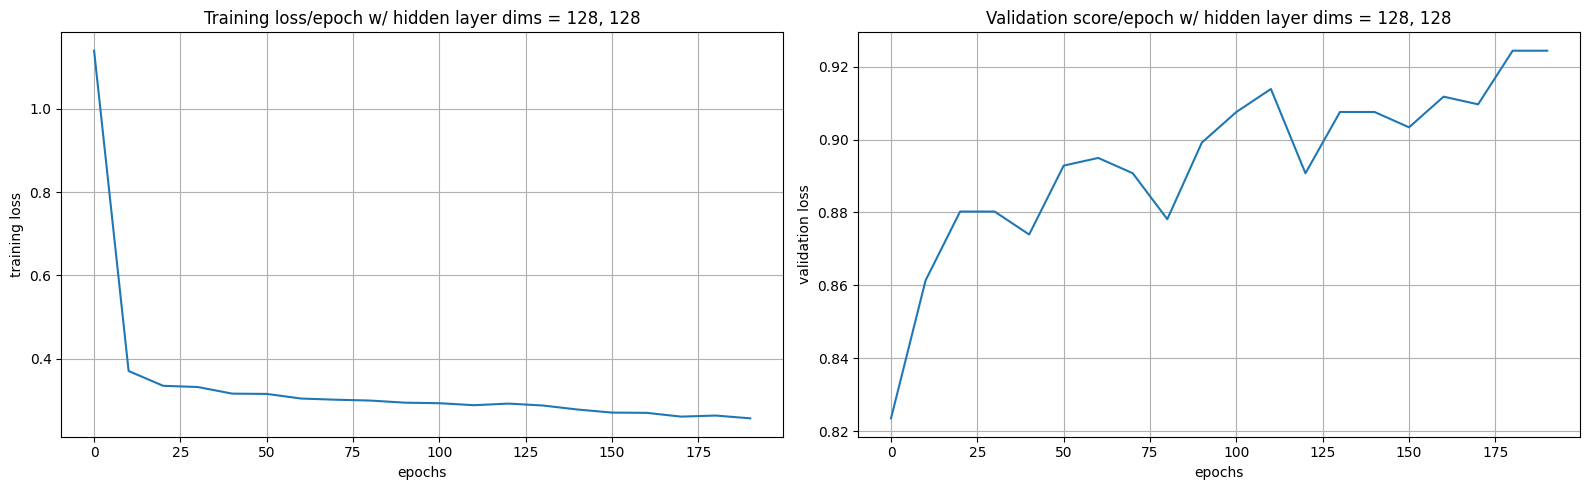

In [14]:
#select best model and train it on both train and val
hl1_dim = 128
hl2_dim = 128
full_ds = mg_train_ds + mg_val_ds
full_dl = DataLoader(full_ds, batch_size=batch_size, shuffle=True)
model = MagicClassifier(input_dim=features_num, hl1_dim=hl1_dim, hl2_dim=hl2_dim, output_dim=output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_loss_dict = {}
val_score_dict = {}
epochs_indices = np.arange(0, epochs, 10)


for epoch in range(epochs):
    model.train()
    losses = []
    for features, targets in full_dl:
        output = model(features)
        loss = criterion(output.view(-1), targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if epoch % 10 == 0:
        val_score = calc_score(model, val_dataloader, device)
        val_score_dict[epoch] = val_score
        current_epoch_loss = np.mean(losses)
        train_loss_dict[epoch] = current_epoch_loss
        print(f"Epoch {epoch}/{epochs}: loss = {current_epoch_loss}, val accuracy = {val_score}")



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.plot(epochs_indices, [train_loss_dict[_epoch] for _epoch in epochs_indices])
ax1.set_title(f"Training loss/epoch w/ hidden layer dims = {hl1_dim}, {hl2_dim}")
ax1.set_xlabel("epochs")
ax1.set_ylabel("training loss")
ax1.grid()

ax2.plot(epochs_indices, [val_score_dict[_epoch] for _epoch in epochs_indices])
ax2.set_title(f"Validation score/epoch w/ hidden layer dims = {hl1_dim}, {hl2_dim}")
ax2.set_xlabel("epochs")
ax2.set_ylabel("validation loss")
ax2.grid()

plt.tight_layout()
plt.show()

In [15]:
#test
model.eval()
mg_train_dataloader = DataLoader(mg_test_ds, batch_size=batch_size, shuffle=True)
with torch.no_grad():
    test_results = model(torch.from_numpy(x_test).float())
    test_score2 = calc_score(model, mg_train_dataloader, device)
print(f"test accuracy: {test_score2}")

test accuracy: 0.9190325972660357


In [16]:
# example of weight initialization
import math
import torch.nn as nn
class MagicClassifier(nn.Module):
    def __init__(self, input_dim, hl1_dim, hl2_dim, output_dim):
        super(MagicClassifier, self).__init__()
        self.hidden_layer = nn.Sequential(
            nn.Linear(input_dim, hl1_dim),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(hl1_dim, hl2_dim),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(hl2_dim, output_dim)
        self.init_weights()

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_normal_(m.weight, gain=1.0)
                if m.bias is not None:
                  fan_in, _ = torch.nn.init._calculate_fan_in_and_fan_out(m.weight)
                  bound = 1 / math.sqrt(fan_in) if fan_in > 0 else 0
                  torch.nn.init.uniform_(m.bias, -bound, bound)

    def forward(self, x):
        return self.output_layer(self.hidden_layer(x))

Epoch 0/200: loss = 0.49081216951211293, val accuracy = 0.8004201680672269
Epoch 10/200: loss = 0.34877139230569204, val accuracy = 0.8718487394957983
Epoch 20/200: loss = 0.33395428756872814, val accuracy = 0.884453781512605
Epoch 30/200: loss = 0.31607393771409986, val accuracy = 0.8928571428571429
Epoch 40/200: loss = 0.30964241226514183, val accuracy = 0.8949579831932774
Epoch 50/200: loss = 0.29747267365455626, val accuracy = 0.9054621848739496
Epoch 60/200: loss = 0.28988849421342217, val accuracy = 0.9096638655462185
Epoch 70/200: loss = 0.29309966613849003, val accuracy = 0.8991596638655462
Epoch 80/200: loss = 0.2824493979414304, val accuracy = 0.9012605042016807
Epoch 90/200: loss = 0.27603673487901687, val accuracy = 0.9054621848739496
Epoch 100/200: loss = 0.27264202684164046, val accuracy = 0.907563025210084
Epoch 110/200: loss = 0.2672719006737073, val accuracy = 0.9264705882352942
Epoch 120/200: loss = 0.26989945967992146, val accuracy = 0.9117647058823529
Epoch 130/200:

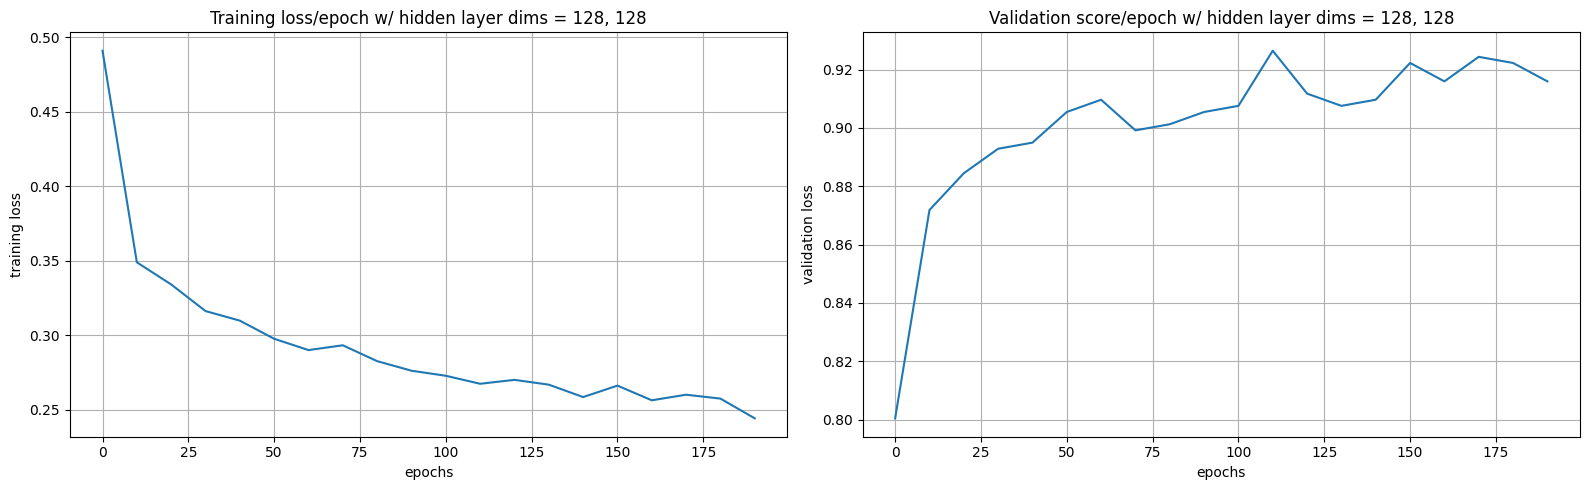

In [17]:
#select best model and train it on both train and val
hl1_dim = 128
hl2_dim = 128
full_ds = mg_train_ds + mg_val_ds
full_dl = DataLoader(full_ds, batch_size=batch_size, shuffle=True)
model = MagicClassifier(input_dim=features_num, hl1_dim=hl1_dim, hl2_dim=hl2_dim, output_dim=output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_loss_dict = {}
val_score_dict = {}
epochs_indices = np.arange(0, epochs, 10)


for epoch in range(epochs):
    model.train()
    losses = []
    for features, targets in full_dl:
        output = model(features)
        loss = criterion(output.view(-1), targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if epoch % 10 == 0:
        val_score = calc_score(model, val_dataloader, device)
        val_score_dict[epoch] = val_score
        current_epoch_loss = np.mean(losses)
        train_loss_dict[epoch] = current_epoch_loss
        print(f"Epoch {epoch}/{epochs}: loss = {current_epoch_loss}, val accuracy = {val_score}")



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
ax1.plot(epochs_indices, [train_loss_dict[_epoch] for _epoch in epochs_indices])
ax1.set_title(f"Training loss/epoch w/ hidden layer dims = {hl1_dim}, {hl2_dim}")
ax1.set_xlabel("epochs")
ax1.set_ylabel("training loss")
ax1.grid()

ax2.plot(epochs_indices, [val_score_dict[_epoch] for _epoch in epochs_indices])
ax2.set_title(f"Validation score/epoch w/ hidden layer dims = {hl1_dim}, {hl2_dim}")
ax2.set_xlabel("epochs")
ax2.set_ylabel("validation loss")
ax2.grid()

plt.tight_layout()
plt.show()

In [18]:
#test
model.eval()
mg_train_dataloader = DataLoader(mg_test_ds, batch_size=batch_size, shuffle=True)
with torch.no_grad():
    test_results = model(torch.from_numpy(x_test).float())
    test_score3 = calc_score(model, mg_train_dataloader, device)
print(f"test accuracy: {test_score3}")

test accuracy: 0.9250788643533123


In [19]:
print(f"without special init - score was {test_score1}")
print(f"with kaiming_normal init - score was {test_score2}")
print(f"with xavier_normal init - score was {test_score2}")

without special init - score was 0.9263932702418507
with kaiming_normal init - score was 0.9190325972660357
with xavier_normal init - score was 0.9190325972660357


According to the results, it seems like both special initilizations hurt performance.

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3 - Design a CNN
---
In this task you are going to design a deep convolutional neural network to classify 10 classes from Imagenet (tench, English springer, cassette player, chain saw, church, French horn, garbage truck, gas pump, golf ball, parachute) - **The Imagenette Dataset**.

* 10 classes, 1 for each object.
* 9469 images for training and 3925 for testing (70/30 separation).
* We will use a downscaled version where the images are resized to $64\times 64$ resolution.

<center><img src="https://storage.googleapis.com/tfds-data/visualization/fig/imagenette-160px-v2-1.0.0.png" style="height:300px"></center>

1. Load the the Imagenette dataset with PyTorch using `torchvision.datasets.Imagenette(
    root='./datasets', split='train', size='160px', download=True, transform=transform_train)`, where `split` is either `'train'` or `'val'`, you can read more here: https://pytorch.org/vision/main/generated/torchvision.datasets.Imagenette.html#torchvision.datasets.Imagenette . Use the `transform` parameter to resize the images to $64 \times 64$ (for train, validation and test) and convert the data to tensors, e.g.,
   
   <code>transform_test=transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),])</code>
    
   Display 5 images from the train set.

   <a href="https://gist.github.com/kevinzakka/d33bf8d6c7f06a9d8c76d97a7879f5cb">Train, Validation and Test Split for torchvision Datasets</a>
3. Design a Convolutional Neural Network (CNN) to classify classes from the images.
    * You are **not allowed** to use `BatchNorm` in your architecture, but can use any other normalization (`GroupNorm`, `LayerNorm`, and etc..).
    * Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fully-connected layers (if you did, explain their sizes)?
    * What is the input dimension? What is the output dimension?
    * Calculate the number of parameters (weights) in the network. What is the model size in MegaBytes (MB)? (see the convolution tutorial). **Print** these numbers.
4. Train the classifier (preferably on a GPU - use Colab for this part if you don't have a GPU).
    * **DO NOT USE ANY IMAGE AUGMENTATIONS IN THIS PART** (You can still use `Normalize` if you wish, but no cropping, flipping and etc...).
    * You are not allowed to use pre-trained models (i.e., no transfer learning, only learning from scratch).
    * Describe the hyper-parameters of the model (batch size, epochs, optimizer, learning rate, scheduler....). How did you tune your model? Did you use a validation set to tune the model?
    * What is the final accuracy on the test set? **Print** it.
        * You need to reach at least 73% accuracy in this section, and 78% for maximum points in section 5.
    * **Plot** the loss curves (and any other statistic you calculate) as a function of epochs/iterations.
6. For the trained classifier, what is the accuracy on the test set when each test image is added a small noise $a=(0.05, 0.01, 0.005)$: $$ \text{image} + a \times \mathcal{N}(0, 1).$$ **Print** the result for each value of $a$.
7. Retrain the classifier, but this time use data augementations of your choosing. Briefly explain what augmentation you chose and how it works. Did the test accuracy improve? **Print** the result.
    * You can use transformations available in `torchvision.transforms` as shown in the tutorial.
    * You are welcome to use <a href="https://kornia.github.io/">`kornia`</a> for the augmentations (**2 points bonus**, maximal grade is still 100).
    * **Plot** the loss curves (and any other statistic you want) as a function of epochs/iterations.

100%|██████████| 99003388/99003388 [01:21<00:00, 1213765.36it/s]


Extracting ./datasets/imagenette2-160.tgz to ./datasets


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


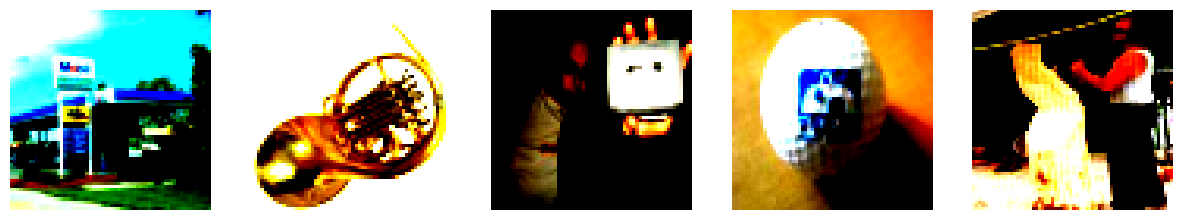

In [1]:
#Q3.1

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch import nn



basic_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64, 64)),
    transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614)),

])




train_dataset = datasets.Imagenette(root='./datasets', split='train', size='160px', download=True, transform=basic_transforms)
val_dataset = datasets.Imagenette(root='./datasets', split='val', size='160px', download=False, transform=basic_transforms)


train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)


def show_images(loader, num_images=5):
    data_iter = iter(loader)
    images, labels = next(data_iter)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    for i in range(num_images):
        ax = axes[i]
        img = images[i].squeeze().permute(1,2,0).numpy()
        ax.imshow(img)
        ax.axis('off')
    plt.show()

show_images(train_loader)



In [38]:
#Q3.2
import torch
import torch.nn as nn

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()

        self.conv_layer = nn.Sequential(
            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.GroupNorm(32,32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.GroupNorm(64,64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.GroupNorm(128,128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.GroupNorm(128,128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.GroupNorm(128,128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.GroupNorm(128,128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # Compute the number of features for the first fully connected layer
        # Input size: 64x64 -> Output after convs and poolings: 8x8
        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(128 * 8 * 8, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        """Perform forward."""
        # conv layers
        x = self.conv_layer(x)

        # flatten
        x = x.view(x.size(0), -1)

        # fc layer
        x = self.fc_layer(x)

        return x

model = MyCNN()
print(model)


MyCNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): GroupNorm(32, 32, eps=1e-05, affine=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): GroupNorm(64, 64, eps=1e-05, affine=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): GroupNorm(128, 128, eps=1e-05, affine=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): GroupNorm(128, 128, eps=1e-05, affine=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout2d(p=0.05, inplace=False)
    (15): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): GroupNorm(128, 128, eps=1e-05, affine=Tr

**in the architechuture we designed, there are 6 convolution layers, with kernel_size=3. the input dimension is 64X64. between every 2 conv layers there is a group-norm layer and Relu, after each 2 layers there is a max-pool layer.
after the convolution block there is FC block consist of 3 layers, with dropout and Relu. the first FC layer has size 512, the second has size 128 and the third has size 10 which is the size of the output.**


In [39]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_params = count_parameters(model)
model_size_mb = num_params * 4 / (1024 ** 2)  # Assuming 4 bytes per parameter (float32)

print(f"Number of parameters: {num_params}")
print(f"Model size: {model_size_mb:.2f} MB")


Number of parameters: 4798986
Model size: 18.31 MB


cuda
Epoch 0/14, Train Loss: 1.8632, Train Acc: 0.3507, Val Loss: 1.4626, Val Acc: 0.5141
Epoch 1/14, Train Loss: 1.2974, Train Acc: 0.5690, Val Loss: 1.1917, Val Acc: 0.6015
Epoch 2/14, Train Loss: 1.0439, Train Acc: 0.6610, Val Loss: 1.0353, Val Acc: 0.6645
Epoch 3/14, Train Loss: 0.8733, Train Acc: 0.7146, Val Loss: 1.0312, Val Acc: 0.6678
Epoch 4/14, Train Loss: 0.7230, Train Acc: 0.7647, Val Loss: 1.0346, Val Acc: 0.6680
Epoch 5/14, Train Loss: 0.5028, Train Acc: 0.8401, Val Loss: 0.8498, Val Acc: 0.7315
Epoch 6/14, Train Loss: 0.4066, Train Acc: 0.8742, Val Loss: 0.8564, Val Acc: 0.7345
Epoch 7/14, Train Loss: 0.3559, Train Acc: 0.8900, Val Loss: 0.8868, Val Acc: 0.7345
Epoch 8/14, Train Loss: 0.3153, Train Acc: 0.9034, Val Loss: 0.8662, Val Acc: 0.7386
Epoch 9/14, Train Loss: 0.2678, Train Acc: 0.9214, Val Loss: 0.8978, Val Acc: 0.7355
Epoch 10/14, Train Loss: 0.2030, Train Acc: 0.9455, Val Loss: 0.8730, Val Acc: 0.7419
Epoch 11/14, Train Loss: 0.1833, Train Acc: 0.9540, Val Los

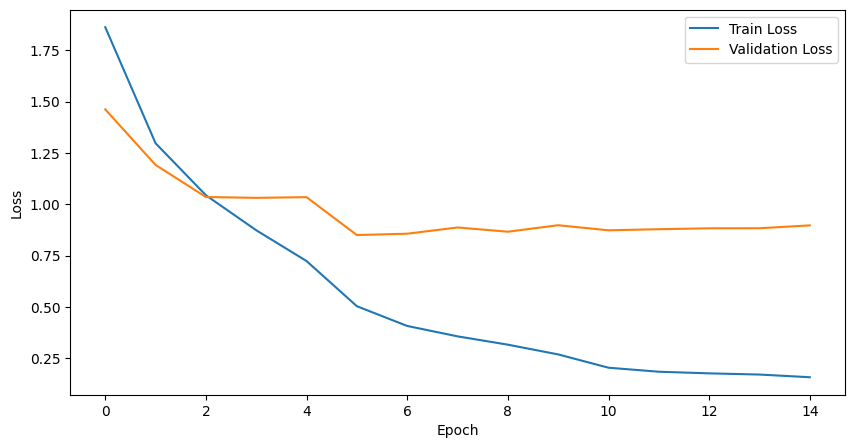

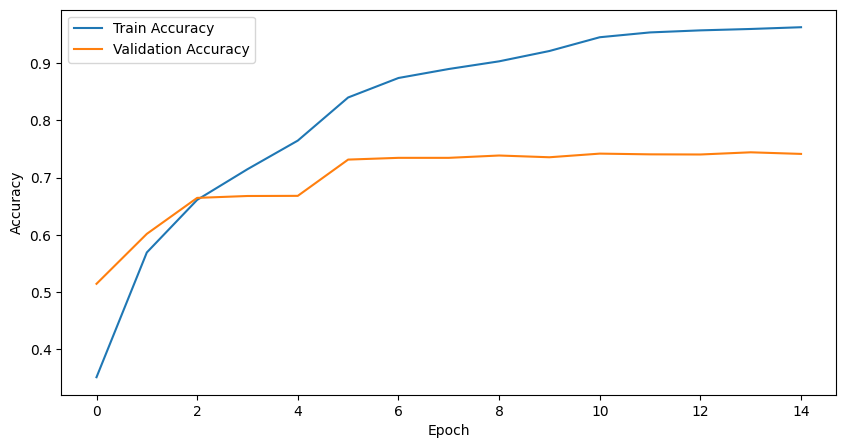

In [43]:
#Q3.3
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt

model = MyCNN()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = model.to(device)

learning_rate = 5e-4
epochs = 15

# Optimizer, loss function, and learning rate scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
schedualer = lr_scheduler.StepLR(optimizer=optimizer, step_size=5, gamma=0.2)

# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer,schedualer, num_epochs=25):
    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        running_corrects = 0

        # Training phase
        for inputs, labels in train_loader:
            inputs, labels = inputs.squeeze().to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)


        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_loss_history.append(epoch_loss)
        train_acc_history.append(epoch_acc.item())

        model.eval()
        val_running_loss = 0.0
        val_corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.squeeze().to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc.item())

        schedualer.step()

        print(f'Epoch {epoch}/{num_epochs - 1}, '
              f'Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    return train_loss_history, train_acc_history, val_loss_history, val_acc_history

train_loss, train_acc, val_loss, val_acc = train_model(model, train_loader, val_loader, criterion, optimizer,schedualer, epochs)

# Plot loss curves
plt.figure(figsize=(10,5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure(figsize=(10,5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [44]:
#Q3.4
import numpy as np

def evaluate_with_noise(model, val_loader, noise_levels):
    model.eval()
    results = {}
    for noise_level in noise_levels:
        corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.squeeze() + noise_level * torch.randn_like(inputs.squeeze())
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                corrects += torch.sum(preds == labels.data)
        acc = corrects.double() / len(val_loader.dataset)
        results[noise_level] = acc.item()
        print(f'Noise level {noise_level}: Accuracy {acc:.4f}')
    return results

# Evaluate with noise
noise_levels = [0.05, 0.01, 0.005]
noise_results = evaluate_with_noise(model, val_loader, noise_levels)


Noise level 0.05: Accuracy 0.7427
Noise level 0.01: Accuracy 0.7414
Noise level 0.005: Accuracy 0.7414


**we tried many types and combinations of augmentations. the only augmentation that gave us better results then the original data is horizontal flip**

cuda
Epoch 0/14, Train Loss: 1.8982, Train Acc: 0.3374, Val Loss: 1.5200, Val Acc: 0.4785
Epoch 1/14, Train Loss: 1.3394, Train Acc: 0.5547, Val Loss: 1.1868, Val Acc: 0.6107
Epoch 2/14, Train Loss: 1.1073, Train Acc: 0.6347, Val Loss: 1.0707, Val Acc: 0.6456
Epoch 3/14, Train Loss: 0.9729, Train Acc: 0.6820, Val Loss: 1.0190, Val Acc: 0.6716
Epoch 4/14, Train Loss: 0.8446, Train Acc: 0.7271, Val Loss: 0.9415, Val Acc: 0.6989
Epoch 5/14, Train Loss: 0.6553, Train Acc: 0.7879, Val Loss: 0.8265, Val Acc: 0.7411
Epoch 6/14, Train Loss: 0.5804, Train Acc: 0.8184, Val Loss: 0.8084, Val Acc: 0.7411
Epoch 7/14, Train Loss: 0.5417, Train Acc: 0.8289, Val Loss: 0.8142, Val Acc: 0.7450
Epoch 8/14, Train Loss: 0.5050, Train Acc: 0.8400, Val Loss: 0.7947, Val Acc: 0.7478
Epoch 9/14, Train Loss: 0.4714, Train Acc: 0.8554, Val Loss: 0.8053, Val Acc: 0.7483
Epoch 10/14, Train Loss: 0.4113, Train Acc: 0.8746, Val Loss: 0.7803, Val Acc: 0.7595
Epoch 11/14, Train Loss: 0.3944, Train Acc: 0.8845, Val Los

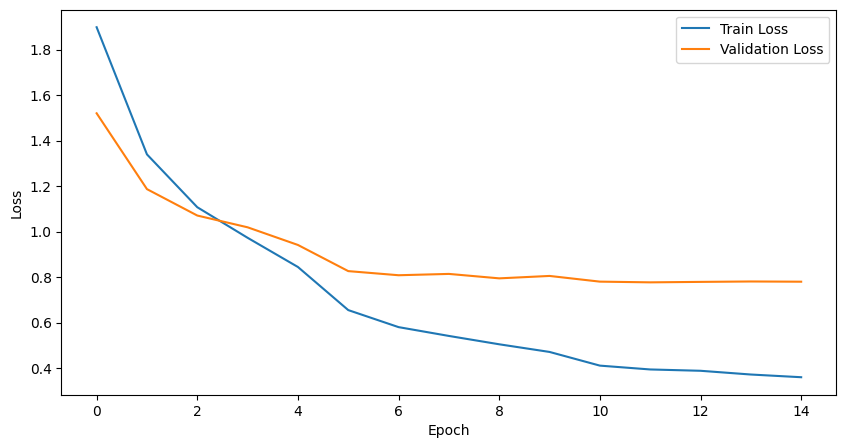

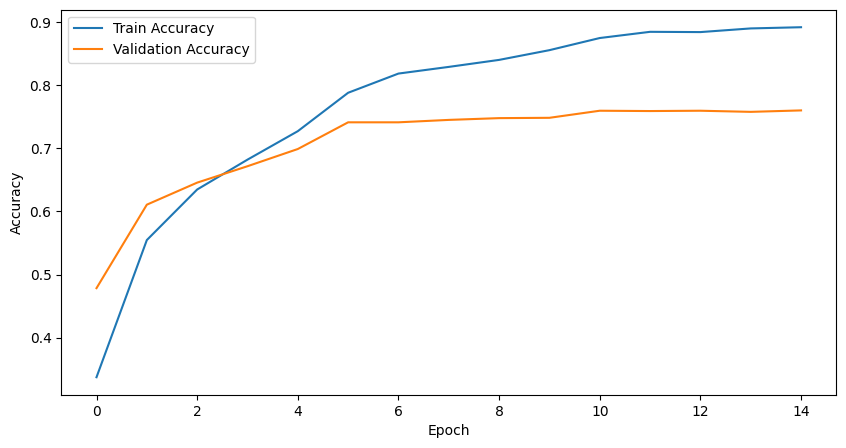

In [47]:
#Q3.5
# !pip install kornia
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import kornia.augmentation as K
from torchvision import datasets, transforms


basic_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64, 64)),
    transforms.Normalize((0.4376821, 0.4437697, 0.47280442), (0.19803012, 0.20101562, 0.19703614)),

])



train_aug = K.AugmentationSequential(
    # K.ColorJitter(0.1, 0.1, 0.1, 0.1, p=0.5),
    K.RandomHorizontalFlip(p=0.5),
    # K.RandomAffine(30, [0.1, 0.1], [0.7, 1.2], [30, 50], p=0.5),
    # K.RandomPerspective(0.5, p=0.5),
    # K.RandomBrightness(0.1, p=0.5),
    # K.RandomContrast(0.1, p=0.5),
    # K.RandomGaussianNoise(mean=0., std=0.1, p=0.5),
    # K.RandomGaussianBlur((3, 3), (0.1, 2.0), p=0.5),
    # K.RandomErasing(scale=(0.02, 0.33), ratio=(0.3, 3.3), p=0.5),
    same_on_batch=False,
)



train_dataset = datasets.Imagenette(root='./datasets', split='train', size='160px', download=False, transform=basic_transform)
val_dataset = datasets.Imagenette(root='./datasets', split='val', size='160px', download=False, transform=basic_transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)


model = MyCNN()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = model.to(device)

learning_rate = 5e-4
epochs = 15

# Optimizer, loss function, and learning rate scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
schedualer = lr_scheduler.StepLR(optimizer=optimizer, step_size=5, gamma=0.2)

def train_model(model, train_loader, val_loader, criterion, optimizer,schedualer, num_epochs=25):
    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0


        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            inputs = train_aug(inputs)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)


        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_loss_history.append(epoch_loss)
        train_acc_history.append(epoch_acc.item())


        model.eval()
        val_running_loss = 0.0
        val_corrects = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels.data)

        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc.item())

        schedualer.step()

        print(f'Epoch {epoch}/{num_epochs - 1}, '
              f'Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    return train_loss_history, train_acc_history, val_loss_history, val_acc_history

train_loss, train_acc, val_loss, val_acc = train_model(model, train_loader, val_loader, criterion, optimizer, schedualer, epochs)

# Plot loss curves
plt.figure(figsize=(10,5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure(figsize=(10,5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/